[View in Colaboratory](https://colab.research.google.com/github/bitcointroy/MLsprints/blob/master/Troy_Bradley_Dimensionality_Reduction_Sprint_Challenge.ipynb)

# Dimensionality Reduction Sprint Challenge

A powerful method for dimensionality reduction is using Principal Components Analysis (PCA).

Students should be able to complete objectives after this sprint:
* Identify the use case for normalization
* Graph the top two dimensions of a high dimensional dataset with PCA
* Compute the eigenvectors and eigenvalues of a dataset

Lets use the UCI Wine Dataset for this Sprint  Challenge: It is high dimensional, numeric, and clean - an excellent opportunity for PCA.

[UCI Wine Data Set](http://archive.ics.uci.edu/ml/datasets/Wine)

The UCI License forbids redistributing their data. We can link directly to it!

[UCI Wine Data Set Data](http://archive.ics.uci.edu/ml/machine-learning-databases/wine/)

In [2]:
# Download the data to your colab instance!
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data -O wine.data

--2018-04-20 17:30:54--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [text/plain]
Saving to: ‘wine.data’

wine.data           100%[===================>]  10.53K  --.-KB/s    in 0s      

2018-04-20 17:30:54 (273 MB/s) - ‘wine.data’ saved [10782/10782]



In [0]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('wine.data')

# Column names from:
# http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names
columns = ['vinyard','alcohol','malic acid','ash','ash alcalinity','magnesium',
           'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
           'Color intensity','Hue','dilute OD280/OD315', 'Proline']

data.columns = columns

vinyard = data['vinyard']
data = data.drop(['vinyard'],axis=1)
colors = np.array(['red','green','blue'])[np.array([vinyard])-1]

# 1. Identify the use case for normalization

Principal Components Analysis will give us a view into our data that maximizes its variance, potentially improving intuition and learning algorithms. Look at the below `data.std()` output. If we use PCA to project the wine dataset onto the 3 dimensions with the highest variance, which ones will they be? How will this projection differ than simply plotting the three dimensions directly?

In [4]:
print(data.std())

alcohol                   0.808808
malic acid                1.119314
ash                       0.275080
ash alcalinity            3.336071
magnesium                14.174018
Total phenols             0.626465
Flavanoids                0.998658
Nonflavanoid phenols      0.124653
Proanthocyanins           0.571545
Color intensity           2.324446
Hue                       0.229135
dilute OD280/OD315        0.705103
Proline                 314.884046
dtype: float64


# 2. Graph the top two dimensions of a high dimensional dataset using PCA

Use PCA with 2 components to plot the top two dimensions of this dataset. Apply the color vector above so that the origin of each sample is visible.

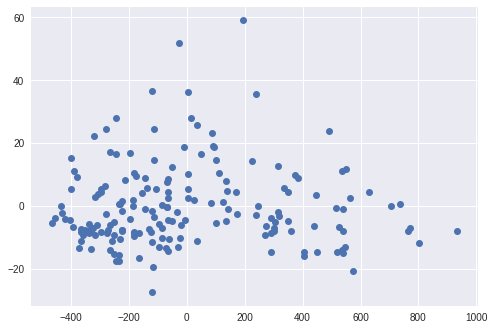

In [8]:
# Use PCA and make a graph of data
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(data)
X_2D = model.transform(data)
#print(model.components_)
#print(np.sqrt(model.singular_values_))
#print(model.get_covariance())
xx, xy = X_2D.T
plt.plot(xx,xy,'o')

# 3. Graph the top two dimensions of a normalized high dimensional dataset using PCA

Use a `normalization` from `scikit.preprocessing` to improve the results of the PCA.

[[ 0.11952718  0.02485542  0.02283696  0.23293668  0.94767179  0.02006328
   0.01733545  0.00396477  0.01440108  0.02394668  0.00983231  0.0258343
  -0.17311533]
 [-0.2582931  -0.11249743 -0.06421034 -0.91278349  0.25988983 -0.02973999
  -0.0165819  -0.01882074 -0.02235519 -0.09800225 -0.00849647 -0.05179892
  -0.03763578]]
[0.97736071 0.01333082]


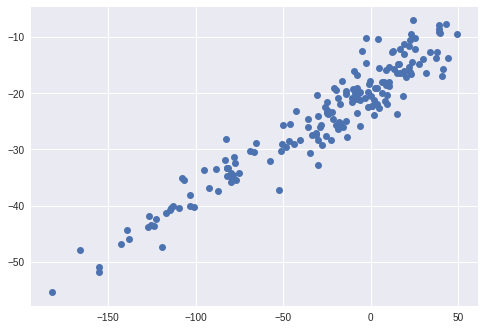

In [14]:
from sklearn import preprocessing

# Use normalization, and PCA, to make a graph of the data
pca_2d = PCA(n_components=2)

data_norm = pd.DataFrame(preprocessing.normalize(data, norm='l2'))

pca_2d.fit(data_norm)

x,y = pca_2d.transform(data).T

plt.plot(x,y, 'o')

# 4. Compute the eigenvectors of a dataset

What are the top-two eigenvectors of the above un-normalized dataset?

In [17]:
# evec = the top two eigenvectors of the UCI Wine dataset, un-normalized

evec = pca_2d.components_
print(evec)

[[ 0.11952718  0.02485542  0.02283696  0.23293668  0.94767179  0.02006328
   0.01733545  0.00396477  0.01440108  0.02394668  0.00983231  0.0258343
  -0.17311533]
 [-0.2582931  -0.11249743 -0.06421034 -0.91278349  0.25988983 -0.02973999
  -0.0165819  -0.01882074 -0.02235519 -0.09800225 -0.00849647 -0.05179892
  -0.03763578]]


# 5. Compute the eigenvalues of a dataset

What are the top-two eigenvalues of the above un-normalized dataset?

In [16]:
# eval = the top two eigenvalues of the UCI Wine dataset, un-normalized

eval = pca_2d.explained_variance_ratio_
print(eval)

[0.97736071 0.01333082]
